Aluno: Kaíque Medeiros Lima

RA: 2587297

Curso: Engenharia de Computação

In [1]:
import pandas as pd
import math
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_excel('ethereum.xlsx')
dados = pd.DataFrame(dados)

In [3]:
# 1. Amostragem simples
amostragem_simples1 = dados.sample(36)

In [4]:
tamanho = len(amostragem_simples1['Máxima'])
R = max(amostragem_simples1['Máxima']) - min(amostragem_simples1['Máxima']) # amplitude total

if tamanho <= 25:
    k = 5
else:
    k = tamanho**(1/2)
    
h = R/k
h = math.ceil(h)

# gerar a tabela
classes = []

# gerar as classes
fa = []

In [5]:
valor = min(amostragem_simples1['Máxima'])
while valor <= max(amostragem_simples1['Máxima']):
    if valor + h == max(amostragem_simples1['Máxima']):
        classes.append('{} |-| {}'.format(valor, valor + h))
        fa.append(((valor <= pd.Series(amostragem_simples1['Máxima'])) & (pd.Series(amostragem_simples1['Máxima']) <= valor + h)).sum())
        valor += h
        break
    else:
        classes.append('{} |- {}'.format(valor, valor+h))
        fa.append(((valor <= pd.Series(amostragem_simples1['Máxima'])) & (pd.Series(amostragem_simples1['Máxima']) < valor + h)).sum())
        valor += h

In [6]:
df = pd.DataFrame(zip(classes, fa), columns=['Intervalo de classes', 'fa'])

In [7]:
# calculando os totais
total = pd.DataFrame((df[['Intervalo de classes', 'fa']]).sum()).T
total['Intervalo de classes'] = 'Total'

In [8]:
# 2. Tabela
df = pd.concat([df, total])
print(df)

  Intervalo de classes  fa
0   2264.66 |- 2569.66  17
1   2569.66 |- 2874.66   5
2   2874.66 |- 3179.66   3
3   3179.66 |- 3484.66   3
4   3484.66 |- 3789.66   2
5   3789.66 |- 4094.66   6
0                Total  36


In [9]:
# 3. Estatística descritiva
data = amostragem_simples1['Máxima']

print(f'Média: %.2f' % st.mean(data))
print(f'Mediana: %.2f' % st.median(data))
print(f'Moda: %.2f' % st.mode(data))
print(f'Variância: %.2f' % st.variance(data))
print(f'Desvio Padrão: %.2f' % st.stdev(data))
print(f'Coeficiente de Variação: %.2f%%' % (st.stdev(data)/st.mean(data) * 100))
print("O Coeficiente de variação resulta num padrão de alta dispersão dos dados.")

Média: 2888.43
Mediana: 2591.43
Moda: 2383.92
Variância: 377805.20
Desvio Padrão: 614.66
Coeficiente de Variação: 21.28%
O Coeficiente de variação resulta num padrão de alta dispersão dos dados.


Text(0.5, 1.0, 'Boxplot')

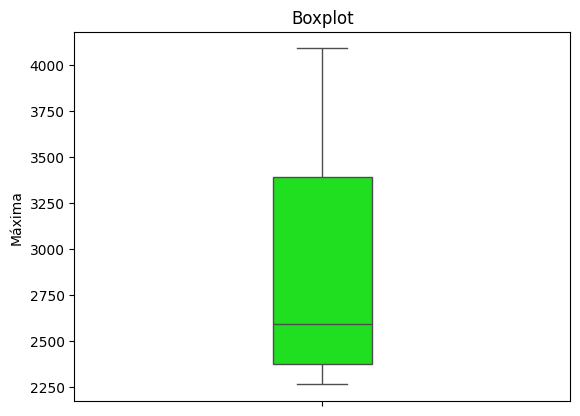

In [10]:
# 4. Boxplot
sns.boxplot(data, color='lime', width=0.2)
plt.title('Boxplot')

(array([20.,  3.,  3.,  4.,  6.]),
 array([2264.66 , 2629.984, 2995.308, 3360.632, 3725.956, 4091.28 ]),
 <BarContainer object of 5 artists>)

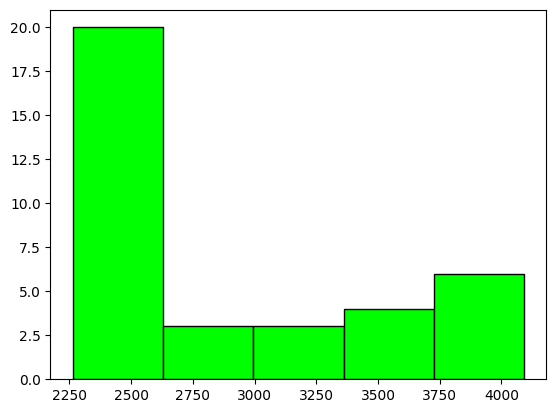

In [11]:
# 5. Histograma
plt.hist(data, bins=5, color='lime', edgecolor='black')

In [12]:
# 6. Análise do boxplot e histograma

# O boxplot e o histograma mostram que a distribuição dos dados
# é assimétrica à direita. A média é maior que a mediana e a moda,
# o que comprova a direção da assimetria.

# dados necessários para fazer o boxplot
q1 = data.quantile(0.25)
q2 = data.quantile(0.5) # mediana
q3 = data.quantile(0.75)
limite_inferior = q1 - 1.5*(q3 - q1)
limite_superior = q3 + 1.5*(q3 - q1)

print(f'Q1: %.2f' % q1)
print(f'Q2: %.2f' % q2)
print(f'Q3: %.2f' % q3)
print(f'Limite Inferior: %.2f' % limite_inferior)
print(f'Limite Superior: %.2f' % limite_superior)

Q1: 2375.74
Q2: 2591.43
Q3: 3389.74
Limite Inferior: 854.73
Limite Superior: 4910.75


In [13]:
# 7. Cálculo do coeficiente de assimetria e curtose
assimetria = data.skew()
print(f'Assimetria: %.2f ' % assimetria)

curtose = data.kurtosis()
print(f'Curtose: %.2f ' % curtose)

print("A assimetria é positiva, o que indica que a distribuição é assimétrica à direita.") 
print("Comprovando o que foi observado no boxplot e no histograma.")


Assimetria: 0.78 
Curtose: -0.93 
A assimetria é positiva, o que indica que a distribuição é assimétrica à direita.
Comprovando o que foi observado no boxplot e no histograma.
